<a href="https://colab.research.google.com/github/UkeshThapa/Human-Activities-recognition/blob/main/Research_Human_activities_Recognition_TML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research on Human Activities Recognition with TML
#### @author1 : John Bernardo
#### @email1 : jaybz.bernardo@gmail.com

####
#### @author2 : Bipun Man Pati Gubaju
#### @email2 : bemaanpati@gmail.com

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------####



#### Code By:
#### @author : Ukesh Thapa
#### @email : yukeshthapa8@gmail.com


In [63]:
# import library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 2 Sensors

# Non-overlapping Dataset

In [32]:
def load_dataset_and_merge(file_paths):
  dfs = []

  # Loop through each file, read it into a DataFrame, and append to the list
  for file_path in file_paths:
      df = pd.read_excel(file_path)
      dfs.append(df)
  combined_df = pd.concat(dfs,axis=0, ignore_index=True)

  return combined_df

In [33]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Human Activities Recognition/Dataset/2 Sensors/non-overlapping/Train_Test_Data"
xlsx_name = ["aung","aung_ph","bipun","john","kaung","kavin","manash","person_2","person_3","praew","su"]

split_data_name = ["manash","john"]

train_data_name = []
test_data_name = []

# train data
for name in xlsx_name:
  if name not in split_data_name:
      train_data_name.append(f"{file_path}/final_{name}.xlsx")

for name in split_data_name:
    test_data_name.append(f"{file_path}/final_{name}.xlsx")


df_train = load_dataset_and_merge(train_data_name)
# test
df_test = load_dataset_and_merge(test_data_name)


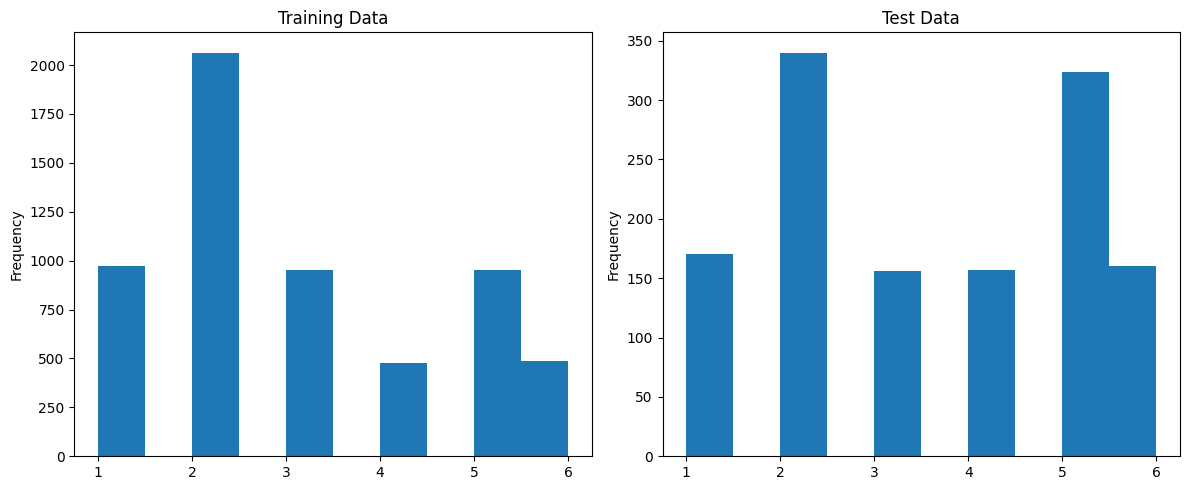

In [34]:
# Data visulaization

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns of subplots

# Plot the output column for the training DataFrame in the first subplot (ax1)
ax1.set_title('Training Data')
# Add your visualization for the output column of the training data (e.g., histogram, bar plot, etc.)
df_train['output'].plot(kind='hist', ax=ax1)

# Plot the output column for the test DataFrame in the second subplot (ax2)
ax2.set_title('Test Data')
# Add your visualization for the output column of the test data (e.g., histogram, bar plot, etc.)
df_test['output'].plot(kind='hist', ax=ax2)

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

In [35]:
# data normalization
normalize_train_data = df_train.iloc[:, :-1]
scaler = MinMaxScaler()
scaler.fit(normalize_train_data)
df_train.iloc[:, :-1] = scaler.transform(normalize_train_data)

X_train = df_train.iloc[:, :-1].values
y_train = df_train['output'].values


In [36]:
normalize_test_data = df_test.iloc[:, :-1]
scaler.fit(normalize_train_data)
df_test.iloc[:, :-1] = scaler.transform(normalize_test_data)

X_test = df_test.iloc[:, :-1].values
y_test = df_test['output'].values

# KNN

In [61]:
# Create a KNN classifier
knn = KNeighborsClassifier()

# Define a grid of hyperparameter values to search
param_grid = {
    'n_neighbors': list(range(3,14)),  # Adjust the range as needed
    'weights': ['uniform', 'distance'],  # Weighting schemes
    'p': [1, 2],  # Minkowski distance power (1 for Manhattan, 2 for Euclidean)
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_


# Create a KNN model with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params)

# Train the best KNN model on the training data
best_knn.fit(X_train, y_train)

# Evaluate the best model on the test data
accuracy = best_knn.score(X_test, y_test)


y_pred = best_knn.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print('Classification Report:')
print(classification_rep)

print('Confusion Matrix:')
print(confusion_mat)

Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.67      0.79       170
           2       0.95      0.92      0.94       340
           3       0.73      0.98      0.84       156
           4       1.00      1.00      1.00       157
           5       0.92      0.95      0.93       324
           6       1.00      1.00      1.00       160

    accuracy                           0.92      1307
   macro avg       0.93      0.92      0.92      1307
weighted avg       0.93      0.92      0.92      1307

Confusion Matrix:
[[114   0  56   0   0   0]
 [  0 313   0   0  27   0]
 [  3   0 153   0   0   0]
 [  0   0   0 157   0   0]
 [  0  16   0   0 308   0]
 [  0   0   0   0   0 160]]


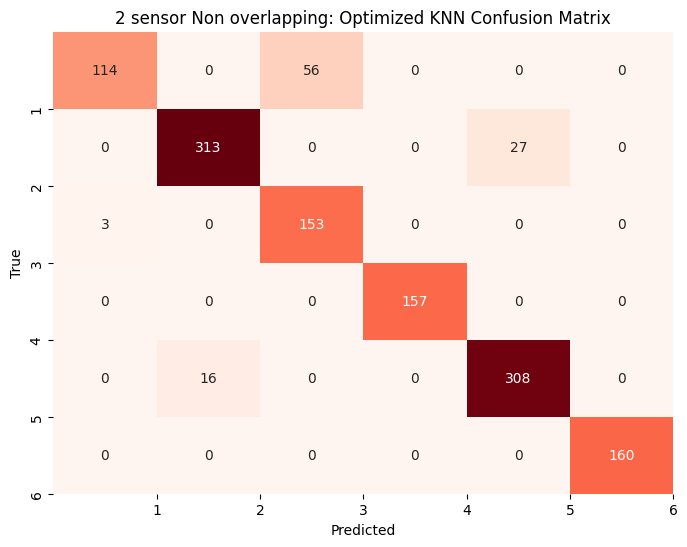

In [75]:


# Visualize the confusion matrix as a heatmap
# confusion_mat = np.array(confusion_mat)

# Create a Matplotlib figure and axis
plt.figure(figsize=(8, 6))

# Plot the heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Reds', cbar=False)  # Use cbar=False to remove the color bar
plt.xlabel("Predicted")
plt.ylabel("True")

# Customize the axis ticks to start at 1
plt.xticks(ticks=np.arange(1, confusion_mat.shape[1] + 1), labels=np.arange(1, confusion_mat.shape[1] + 1))
plt.yticks(ticks=np.arange(1, confusion_mat.shape[0] + 1), labels=np.arange(1, confusion_mat.shape[0] + 1))

# Add a title
plt.title("2 sensor Non overlapping: Optimized KNN Confusion Matrix")

# Show the plot
plt.show()

In [95]:
from sklearn.metrics import precision_score, recall_score, f1_score

micro_precision = precision_score(y_test, y_pred, average='micro')
micro_recall = recall_score(y_test, y_pred, average='micro')
micro_f1 = f1_score(y_test, y_pred, average='micro')

# Macro-averaged precision, recall, and F1-score
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')

# Display the results
print("Micro-Averaged Precision:", micro_precision)
print("Micro-Averaged Recall:", micro_recall)
print("Micro-Averaged F1-Score:", micro_f1)
print("Macro-Averaged Precision:", macro_precision)
print("Macro-Averaged Recall:", macro_recall)
print("Macro-Averaged F1-Score:", macro_f1)

Micro-Averaged Precision: 0.9219586840091814
Micro-Averaged Recall: 0.9219586840091814
Micro-Averaged F1-Score: 0.9219586840091814
Macro-Averaged Precision: 0.9295311928094265
Macro-Averaged Recall: 0.9204271642180138
Macro-Averaged F1-Score: 0.9172093057932829


In [56]:
# Cosine KNN classifier
cosine_knn = KNeighborsClassifier(metric='cosine')

# Define a grid of hyperparameter values to search
param_grid = {
    'n_neighbors': list(range(3,14)),  # Adjust the range as needed
    'weights': ['uniform', 'distance'],  # Weighting schemes
    'p': [1, 2],  # Minkowski distance power (1 for Manhattan, 2 for Euclidean)
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=cosine_knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_


# Create a KNN model with the best hyperparameters
cosine_knn = KNeighborsClassifier(**best_params)

# Train the best KNN model on the training data
cosine_knn.fit(X_train, y_train)



Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.71      0.81       170
           2       0.94      0.91      0.92       340
           3       0.75      0.96      0.85       156
           4       1.00      1.00      1.00       157
           5       0.91      0.94      0.92       324
           6       1.00      1.00      1.00       160

    accuracy                           0.92      1307
   macro avg       0.93      0.92      0.92      1307
weighted avg       0.92      0.92      0.92      1307

Confusion Matrix:
[[121   0  49   0   0   0]
 [  0 309   0   0  31   0]
 [  6   0 150   0   0   0]
 [  0   0   0 157   0   0]
 [  0  21   0   0 303   0]
 [  0   0   0   0   0 160]]


In [57]:

# Evaluate the best model on the test data
cosine_knn_accuracy = cosine_knn.score(X_test, y_test)

cosine_knn_y_pred = cosine_knn.predict(X_test)

cosine_knn_classification_rep = classification_report(y_test, cosine_knn_y_pred)

cosine_knn_confusion_mat = confusion_matrix(y_test, cosine_knn_y_pred)

print('Classification Report:')
print(cosine_knn_classification_rep)

print('Confusion Matrix:')
print(cosine_knn_confusion_mat)

Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.71      0.81       170
           2       0.94      0.91      0.92       340
           3       0.75      0.96      0.85       156
           4       1.00      1.00      1.00       157
           5       0.91      0.94      0.92       324
           6       1.00      1.00      1.00       160

    accuracy                           0.92      1307
   macro avg       0.93      0.92      0.92      1307
weighted avg       0.92      0.92      0.92      1307

Confusion Matrix:
[[121   0  49   0   0   0]
 [  0 309   0   0  31   0]
 [  6   0 150   0   0   0]
 [  0   0   0 157   0   0]
 [  0  21   0   0 303   0]
 [  0   0   0   0   0 160]]


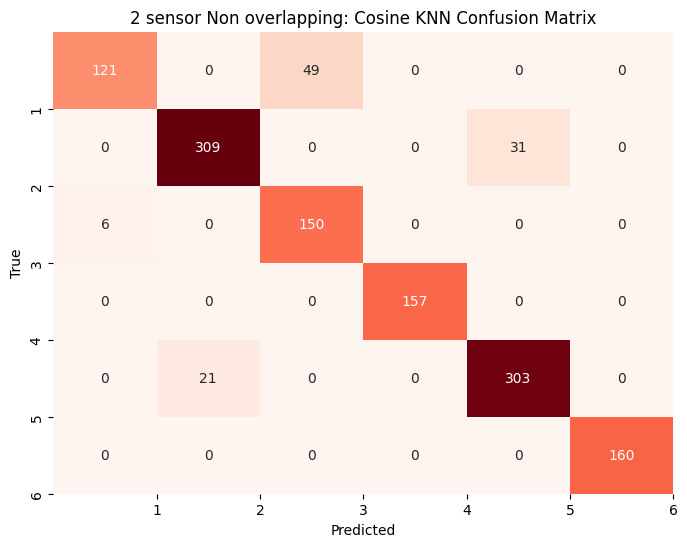

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the confusion matrix as a heatmap
# confusion_mat = np.array(confusion_mat)

# Create a Matplotlib figure and axis
plt.figure(figsize=(8, 6))

# Plot the heatmap
sns.heatmap(cosine_knn_confusion_mat, annot=True, fmt='d', cmap='Reds', cbar=False)  # Use cbar=False to remove the color bar
plt.xlabel("Predicted")
plt.ylabel("True")

# Customize the axis ticks to start at 1
plt.xticks(ticks=np.arange(1, cosine_knn_confusion_mat.shape[1] + 1), labels=np.arange(1, cosine_knn_confusion_mat.shape[1] + 1))
plt.yticks(ticks=np.arange(1, cosine_knn_confusion_mat.shape[0] + 1), labels=np.arange(1, cosine_knn_confusion_mat.shape[0] + 1))

# Add a title
plt.title("2 sensor Non overlapping: Cosine KNN Confusion Matrix")

# Show the plot
plt.show()

In [96]:
best_knn

KNeighborsClassifier(n_neighbors=6, p=1)

In [99]:
cv_data_name = []
for name in xlsx_name:
    cv_data_name.append(f"{file_path}/final_{name}.xlsx")

df_all = load_dataset_and_merge(cv_data_name)

normalize_all_data = df_all.iloc[:, :-1]
scaler.fit(normalize_all_data)
df_all.iloc[:, :-1] = scaler.transform(normalize_all_data)

X = df_all.iloc[:, :-1].values
y = df_all['output'].values

In [104]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier  # Replace with your choice of classifier

# Assuming you have your features (X) and target labels (y)


# Choose the number of folds for cross-validation
n_splits = 30  # Adjust as needed

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
confusion_matrices = []

# Perform k-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)  # You can choose a different random state

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the classifier on the training data
    best_knn.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = best_knn.predict(X_test)

    # Calculate evaluation metrics for this fold
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='micro'))
    recall_scores.append(recall_score(y_test, y_pred, average='micro'))
    f1_scores.append(f1_score(y_test, y_pred, average='micro'))
    roc_auc_scores.append(roc_auc_score(y_test, best_knn.predict_proba(X_test), multi_class='ovr'))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

# Calculate mean and standard deviation for each metric
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
mean_roc_auc = np.mean(roc_auc_scores)
std_roc_auc = np.std(roc_auc_scores)

# Display the results
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation (Accuracy):", std_accuracy)
print("Mean Precision:", mean_precision)
print("Standard Deviation (Precision):", std_precision)
print("Mean Recall:", mean_recall)
print("Standard Deviation (Recall):", std_recall)
print("Mean F1-Score:", mean_f1)
print("Standard Deviation (F1-Score):", std_f1)
print("Mean ROC-AUC:", mean_roc_auc)
print("Standard Deviation (ROC-AUC):", std_roc_auc)

# Optionally, you can analyze the confusion matrices and make model selection based on your requirements.


Mean Accuracy: 0.9711670124481329
Standard Deviation (Accuracy): 0.00965077264378493
Mean Precision: 0.9711670124481329
Standard Deviation (Precision): 0.00965077264378493
Mean Recall: 0.9711670124481329
Standard Deviation (Recall): 0.00965077264378493
Mean F1-Score: 0.9711670124481329
Standard Deviation (F1-Score): 0.009650772643784904
Mean ROC-AUC: 0.9973187435554394
Standard Deviation (ROC-AUC): 0.001908842737694311


In [106]:
n_splits = 10  # Number of cross-validation folds
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)  # Initialize cross-validation
confusion_matrices = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the classifier on the training data
    best_knn.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = best_knn.predict(X_test)

    # Calculate and store the confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Analyze the confusion matrices and make model selection based on your requirements
for i, cm in enumerate(confusion_matrices):
    print(f"Confusion Matrix (Fold {i + 1}):")
    print(cm)
    # You can perform additional analysis or model selection here based on the confusion matrices.
# In this co

Confusion Matrix (Fold 1):
[[133   0   0   0   0   0]
 [  0 238   0   0   1   0]
 [  1   0 113   0   0   0]
 [  0   0   0  53   0   0]
 [  0  22   0   0  92   0]
 [  0   0   0   0   0  69]]
Confusion Matrix (Fold 2):
[[100   0   1   0   0   0]
 [  0 260   0   0   3   0]
 [  1   0  97   0   0   0]
 [  0   0   0  60   0   0]
 [  0  17   0   0 111   0]
 [  0   0   0   0   0  72]]
Confusion Matrix (Fold 3):
[[122   0   1   0   0   0]
 [  0 234   0   0   4   0]
 [  0   1 125   0   0   0]
 [  0   0   0  62   0   0]
 [  0  14   0   0 104   0]
 [  0   0   0   0   0  55]]
Confusion Matrix (Fold 4):
[[111   0   0   0   0   0]
 [  0 221   0   0   2   0]
 [  0   0 108   0   0   0]
 [  0   0   0  67   0   0]
 [  0  17   0   0 127   0]
 [  0   0   0   0   0  68]]
Confusion Matrix (Fold 5):
[[ 96   0   1   0   0   0]
 [  0 243   0   0  10   0]
 [  0   0 125   0   0   0]
 [  0   0   0  56   0   0]
 [  0  15   0   0 116   0]
 [  0   0   0   0   0  59]]
Confusion Matrix (Fold 6):
[[106   0   1   0   0  